In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#loading streaming data 
netflix_df = pd.read_csv('/Users/vanessaokosun/Downloads/netflix_titles.csv')
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [12]:
# Display basic info
print(f"Dataset dimensions: {netflix_df.shape}")
print(f"Movie Time period covered: {netflix_df['release_year'].min()} to {netflix_df['release_year'].max()}")
print(f"Number of unique titles: {netflix_df['title'].nunique()}")

Dataset dimensions: (8807, 12)
Movie Time period covered: 1925 to 2021
Number of unique titles: 8807


In [13]:
# Check data types and missing values
netflix_df.info()

# Check summary statistics
netflix_df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [14]:
# Check missing values
missing_data = netflix_df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_data / len(netflix_df)) * 100
missing_df = pd.DataFrame({'missing_count': missing_data, 'missing_percent': missing_percent})
missing_df[missing_df['missing_count'] > 0]

,missing_count,missing_percent
director,2634,29.908028
country,831,9.435676
cast,825,9.367549
date_added,10,0.113546
rating,4,0.045418
duration,3,0.034064


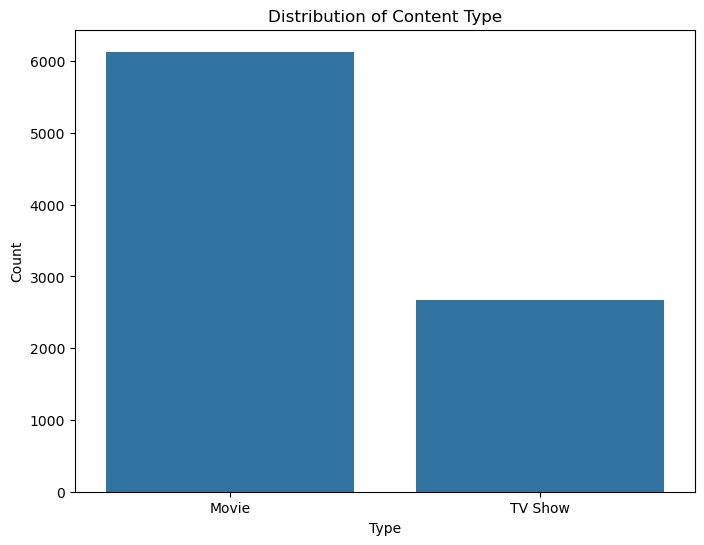

In [17]:
# Distribution of content type
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=netflix_df)
plt.title('Distribution of Content Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

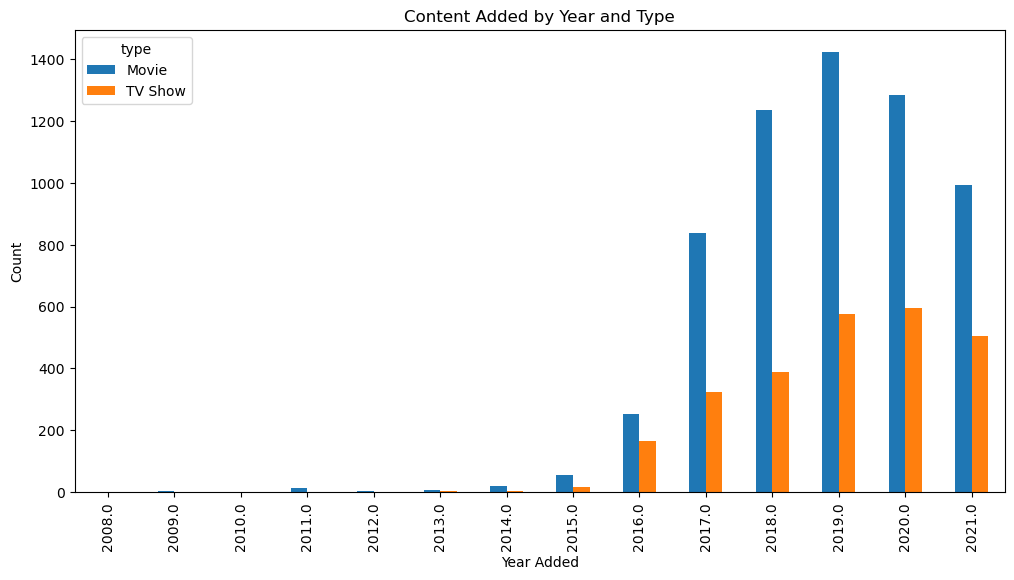

In [20]:
# Content added over time (by year)
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], errors='coerce')
netflix_df['year_added'] = netflix_df['date_added'].dt.year
netflix_df['month_added'] = netflix_df['date_added'].dt.month

yearly_content = netflix_df.groupby(['year_added', 'type']).size().unstack().fillna(0)
yearly_content.plot(kind='bar', figsize=(12, 6))
plt.title('Content Added by Year and Type')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.show()

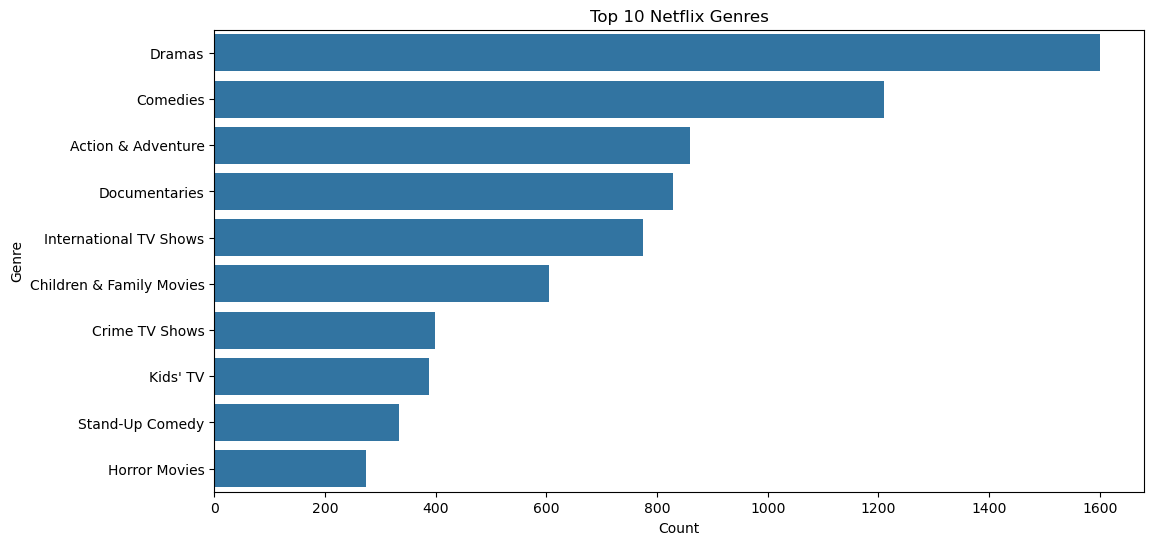

In [21]:
# Top 10 genres
netflix_df['main_genre'] = netflix_df['listed_in'].str.split(',').str[0].str.strip()
plt.figure(figsize=(12, 6))
sns.countplot(y='main_genre', data=netflix_df, order=netflix_df['main_genre'].value_counts().index[:10])
plt.title('Top 10 Netflix Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

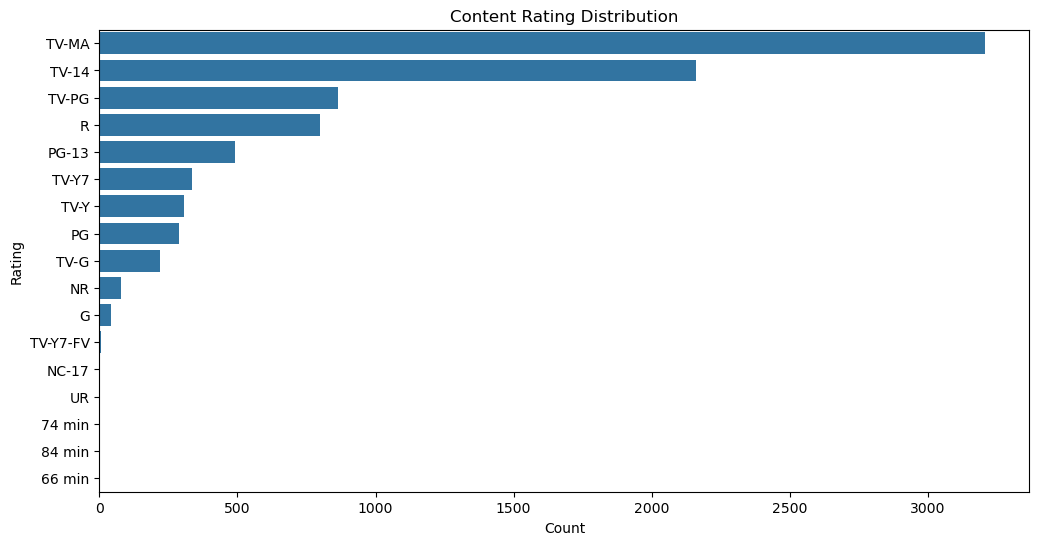

In [23]:
# Content rating distribution
plt.figure(figsize=(12, 6))
sns.countplot(y='rating', data=netflix_df, order=netflix_df['rating'].value_counts().index)
plt.title('Content Rating Distribution')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()